<a href="https://colab.research.google.com/github/AntonioFialhoSN/Rede-Neurais-Avalia-o-P3-Parte1/blob/main/Rede_Neurais_Avalia%C3%A7%C3%A3o_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (AED)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_gender = pd.read_csv("gender_submission.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
df.shape

(891, 12)

In [272]:
df.info()

# Survival (Sobrevivência):0 = Não 1 = Sim

# Pclass (Classe do passageiro): Proxy para status socioeconômico (NSE) 1ª = Classe alta 2ª = Classe média 3ª = Classe baixa

# sibsp (Número de irmãos/cônjuges a bordo): Irmãos = irmão, irmã, meio-irmão, meia-irmã Cônjuge = marido, esposa (amantes e noivos foram ignorados)

# parch (Número de pais/filhos a bordo): Pais = mãe, pai Filhos = filha, filho, enteada, enteado Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

# Ticket (Número do bilhete): Número do bilhete

# Fare (Tarifa): Valor pago pela passagem

# Cabin (Cabine):Número da cabine

# Embarked (Porto de embarque): C = Cherbourg Q = Queenstown S = Southampton

# Name (Nome), Sex (Sexo), Age (Idade): Autoexplicativos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [273]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


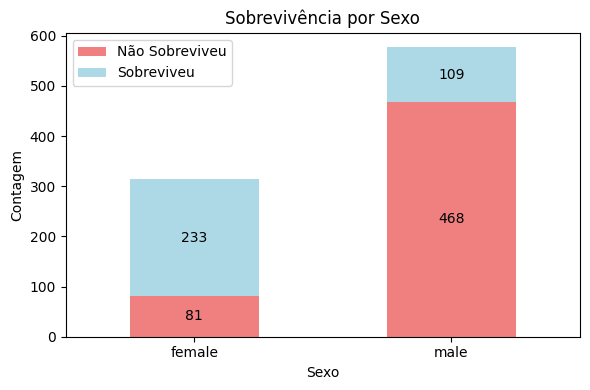

In [274]:
# Stacked bar – sobrevivência por sexo
counts = df.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
counts.columns = ['Não Sobreviveu', 'Sobreviveu']
ax = counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], figsize=(6,4))
plt.title("Sobrevivência por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.tight_layout()
plt.show()

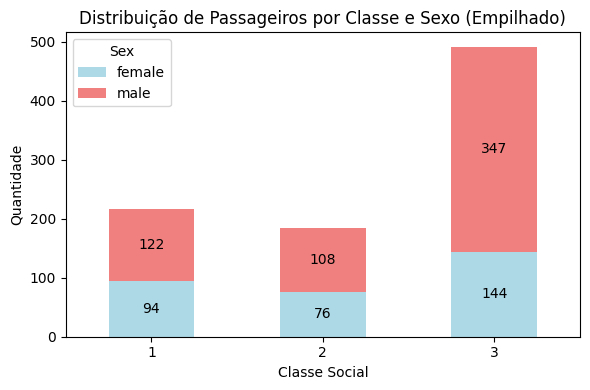

In [275]:
# Agrupa os dados por Classe e Sexo, contando ocorrências
counts = df.groupby('Pclass')['Sex'].value_counts().unstack().fillna(0)

# Define cores pastel para Masculino/Feminino
colors = ['lightblue', 'lightcoral']  # Masculino (azul), Feminino (rosa)

# Plota o gráfico de barras empilhadas
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(6,4))
plt.title("Distribuição de Passageiros por Classe e Sexo (Empilhado)")
plt.xlabel("Classe Social")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos em cada segmento
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

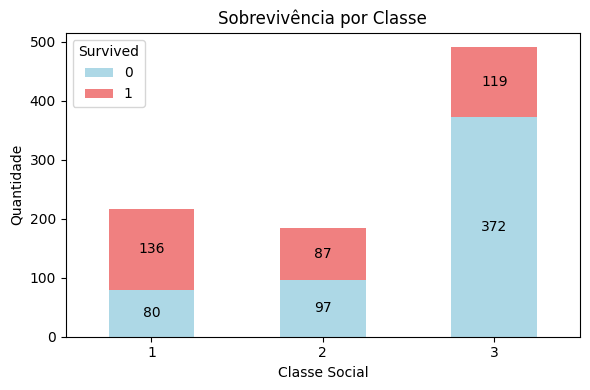

In [276]:
# Agrupa os dados por Classe e Sexo, contando ocorrências
counts = df.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)

# Define cores pastel para Masculino/Feminino
colors = ['lightblue', 'lightcoral']  # Masculino (azul), Feminino (rosa)

# Plota o gráfico de barras empilhadas
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(6,4))
plt.title("Sobrevivência por Classe")
plt.xlabel("Classe Social")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos em cada segmento
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

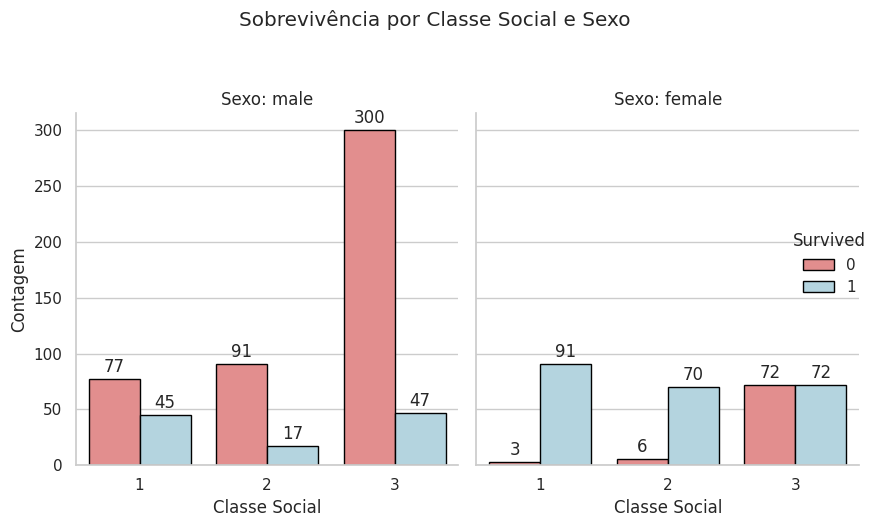

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set(style="whitegrid")

# Cria subplots separados por Sexo
g = sns.catplot(
    x='Pclass',          # Classe no eixo X
    hue='Survived',      # Sobrevivência como cor
    col='Sex',           # Divide em colunas por Sexo
    data=df,
    kind='count',        # Gráfico de contagem
    palette=['lightcoral', 'lightblue'],  # Cores para Não/Sobreviveu
    edgecolor='black',   # Borda das barras
    height=5,            # Altura
    aspect=0.8           # Proporção
)

# Títulos e labels
g.set_axis_labels("Classe Social", "Contagem")
g.set_titles("Sexo: {col_name}")
g.fig.suptitle("Sobrevivência por Classe Social e Sexo", y=1.05)

# Adiciona rótulos nas barras
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=2)

plt.tight_layout()
plt.show()

Contagem de Passageiros por Porto de Embarque e Classe:
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


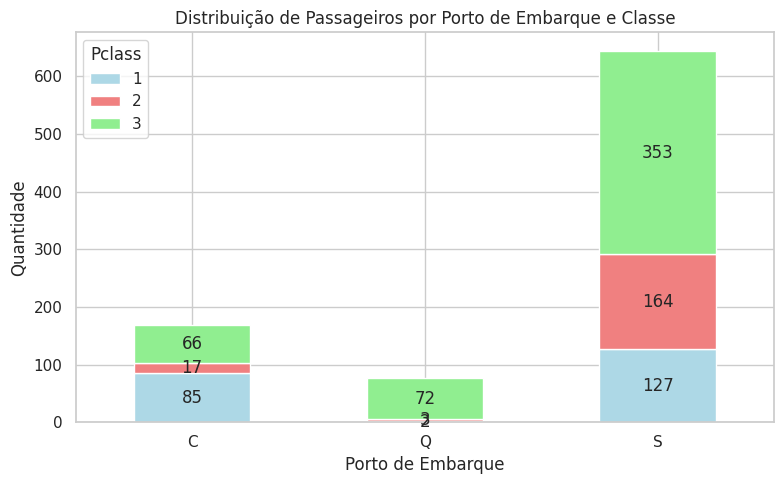

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agrupa os dados por 'Embarked' e 'Pclass' ---
counts = df.groupby('Embarked')['Pclass'].value_counts().unstack().fillna(0)

# --- 2. Mostra os dados numéricos no console ---
print("Contagem de Passageiros por Porto de Embarque e Classe:")
print(counts)

# --- 3. Configura o gráfico de barras empilhadas ---
colors = ['lightblue', 'lightcoral', 'lightgreen']  # Cores para cada classe (1ª, 2ª, 3ª)
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

# --- 4. Personaliza o gráfico ---
plt.title("Distribuição de Passageiros por Porto de Embarque e Classe")
plt.xlabel("Porto de Embarque")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos com os valores
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

#Probabilidade

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
survival_rate = df['Survived'].mean()
print(f"Taxa geral de sobrevivência: {survival_rate:.2%}")

Taxa geral de sobrevivência: 38.38%


In [280]:
print("Probabilidade de sobrevivência por sexo (%):")
print((df.groupby('Sex')['Survived'].mean()).apply(lambda x: f"{x:.1%}"))

Probabilidade de sobrevivência por sexo (%):
Sex
female    74.2%
male      18.9%
Name: Survived, dtype: object


In [281]:
# Probabilidade de sobrevivência por sexo e classe
prob_sobrevivencia_sexo_classe = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Formatando para melhor visualização (em percentual)
resultado = prob_sobrevivencia_sexo_classe.unstack().apply(lambda x: x * 100).round(1)

print("Probabilidade de sobrevivência por sexo e classe (%):")
print(resultado)

Probabilidade de sobrevivência por sexo e classe (%):
Pclass     1     2     3
Sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5


In [282]:
# Taxa de sobrevivência por local de embarque (em %)
taxa_sobrevivencia_embarque = df.groupby('Embarked')['Survived'].mean() * 100

print("Taxa de sobrevivência por local de embarque (%):")
print(taxa_sobrevivencia_embarque.round(2))

Taxa de sobrevivência por local de embarque (%):
Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


In [283]:
# Taxa de sobrevivência por Embarked e Pclass (em %)
sobrevivencia_embarque_classe = df.groupby(['Embarked', 'Pclass'])['Survived'].mean() * 100

# Reorganizando os dados para melhor visualização (formato de tabela)
resultado = sobrevivencia_embarque_classe.unstack().round(1)

print("Taxa de Sobrevivência por Porto de Embarque e Classe Social (%):")
print(resultado)

Taxa de Sobrevivência por Porto de Embarque e Classe Social (%):
Pclass       1     2     3
Embarked                  
C         69.4  52.9  37.9
Q         50.0  66.7  37.5
S         58.3  46.3  19.0


In [284]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("train.csv")

# Calcular taxa de sobrevivência por Embarked, Pclass e Sex (em %)
sobrevivencia = df.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean() * 100

# Reorganizar os dados para melhor visualização
resultado = sobrevivencia.unstack().unstack().round(1)

print("Taxa de Sobrevivência por Porto de Embarque, Classe Social e Sexo (%):")
print(resultado)

# Opcional: Salvar em Excel
resultado.to_excel("sobrevivencia_embarque_classe_sexo.xlsx")

#C = Cherbourg Q = Queenstown S = Southampton

Taxa de Sobrevivência por Porto de Embarque, Classe Social e Sexo (%):
Sex      female               male            
Pclass        1      2     3     1     2     3
Embarked                                      
C          97.7  100.0  65.2  40.5  20.0  23.3
Q         100.0  100.0  72.7   0.0   0.0   7.7
S          95.8   91.0  37.5  35.4  15.5  12.8


## Limpeza de Dados

In [285]:
total_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {total_duplicados}")

Total de linhas duplicadas: 0


In [286]:
total_valores_faltantes = df.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [287]:
total_valores_faltantes = df_test.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [2]:
df_1 = df
df_1['Sex'] = df_1['Sex'].map({'male': 0, 'female': 1})
df_1 = df_1.drop(['PassengerId', 'Cabin'], axis=1)
df_2 = df_1
df_2['Embarked'] = df_2['Embarked'].fillna('S')
df_2['Embarked'] = df_2['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_2 = df_2.drop(['Ticket'], axis=1)

df_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [3]:
df_test_1 = df_test
df_test_1['Sex'] = df_test_1['Sex'].map({'male': 0, 'female': 1})
df_test_1 = df_test_1.drop(['PassengerId', 'Cabin'], axis=1)
df_test_2 = df_test_1
df_test_2['Embarked'] = df_test_2['Embarked'].fillna('S')
df_test_2['Embarked'] = df_test_2['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test_2 = df_test_2.drop(['Ticket'], axis=1)

df_test_2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


In [4]:
df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [5]:
df_test_2['Title'] = df_test_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

/tmp/ipython-input-6-3034418037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


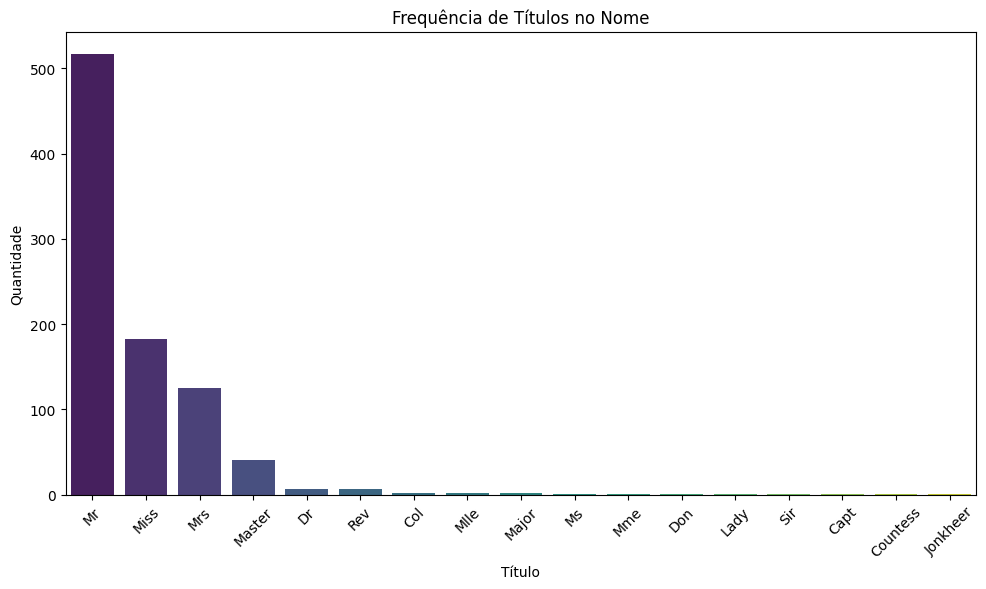

In [6]:
df_2['Title'] = df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Contagem dos títulos
title_counts = df_2['Title'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.xlabel('Título')
plt.ylabel('Quantidade')
plt.title('Frequência de Títulos no Nome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
missing_age_by_title = df_2[df_2['Age'].isna()].groupby('Title').size().reset_index(name='Missing_Age_Count')

# Total de passageiros por título
total_by_title = df_2['Title'].value_counts().reset_index(name='Total_Count')

# Juntar com a contagem de missing
missing_stats = pd.merge(missing_age_by_title, total_by_title, on='Title')

# Calcular porcentagem de missing
missing_stats['Missing_Percentage'] = (missing_stats['Missing_Age_Count'] / missing_stats['Total_Count']) * 100

# Ordenar do maior para o menor
missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)

print(missing_stats)

    Title  Missing_Age_Count  Total_Count  Missing_Percentage
3      Mr                119          517           23.017408
2    Miss                 36          182           19.780220
0      Dr                  1            7           14.285714
4     Mrs                 17          125           13.600000
1  Master                  4           40           10.000000


In [8]:
# Calcular a mediana de idade por título
median_age_by_title = df_2.groupby('Title')['Age'].median().reset_index()

# Criar um dicionário de mapeamento título -> mediana
title_median_map = median_age_by_title.set_index('Title')['Age'].to_dict()

# Preencher os valores NaN usando o mapa
df_2['Age'] = df_2.apply(
    lambda row: title_median_map[row['Title']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

# Verificar se ainda há NaN
print("Valores NaN restantes em Age:", df_2['Age'].isna().sum())

Valores NaN restantes em Age: 0


In [9]:
# Calcular a mediana de idade por título
median_age_by_title = df_test_2.groupby('Title')['Age'].median().reset_index()

# Criar um dicionário de mapeamento título -> mediana
title_median_map = median_age_by_title.set_index('Title')['Age'].to_dict()

# Preencher os valores NaN usando o mapa
df_test_2['Age'] = df_test_2.apply(
    lambda row: title_median_map[row['Title']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

# Verificar se ainda há NaN
print("Valores NaN restantes em Age:", df_test_2['Age'].isna().sum())

Valores NaN restantes em Age: 1


In [10]:
least_occuring = ['Don', 'Rev', 'Dr', 'Mme', 'Ms',
                  'Major', 'Lady', 'Sir', 'Mlle', 'Col',
                  'Capt', 'Countess', 'Jonkheer']


df_2['Title'] = df_2['Title'].replace(least_occuring, 'Rare')

In [11]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_2['Title'] = df_2['Title'].map(title_mapping)
df_2.drop('Name', axis=1, inplace=True)

In [12]:
df_2['Title'].unique()

array([1, 3, 2, 4, 5])

In [13]:
df_test_2['Title'] = df_test_2['Title'].replace(least_occuring, 'Rare')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_test_2['Title'] = df_test_2['Title'].map(title_mapping)
df_test_2.drop('Name', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


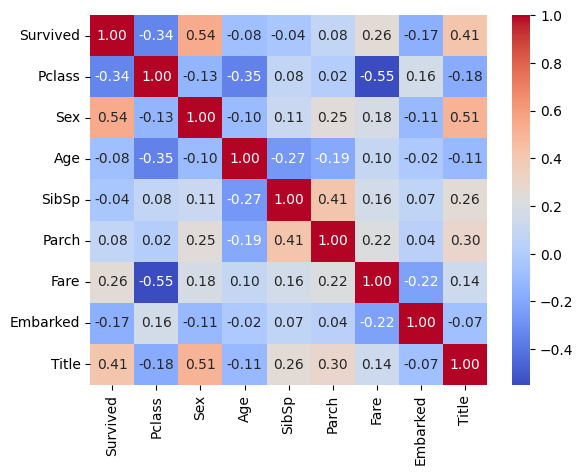

In [14]:
df_2.info()
corr_train = df_2.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
from sklearn.utils import resample

# Separar classes
df_majority = df_2[df_2['Survived'] == 0]
df_minority = df_2[df_2['Survived'] == 1]

# Undersample da classe majoritária
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Juntar
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [16]:
df_3 = df_balanced.drop(['Survived'],axis=1)
df_3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
312,2,1,26.0,1,1,26.0000,2,3
124,1,0,54.0,0,1,77.2875,2,1
783,3,0,30.0,1,2,23.4500,2,1
167,3,1,45.0,1,4,27.9000,2,3
772,2,1,57.0,0,0,10.5000,2,3


In [17]:
df_3['PclassSex'] = df_3['Pclass'] * 10 + df_3['Sex']
df_3['FamilySize'] = df_3['SibSp'] + df_3['Parch'] + 1
df_3.drop(['SibSp', 'Parch','Pclass', 'Sex'], axis=1, inplace=True)
df_3.head()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
312,26.0,26.0000,2,3,21,3
124,54.0,77.2875,2,1,10,2
783,30.0,23.4500,2,1,30,4
167,45.0,27.9000,2,3,31,6
772,57.0,10.5000,2,3,21,1


In [18]:
df_test_2['PclassSex'] = df_test_2['Pclass'] * 10 + df_test_2['Sex']
df_test_2['FamilySize'] = df_test_2['SibSp'] + df_test_2['Parch'] + 1
df_test_2.drop(['SibSp', 'Parch','Pclass', 'Sex'], axis=1, inplace=True)
df_test_2.head()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
0,34.5,7.8292,1,1.0,30,1
1,47.0,7.0000,2,3.0,31,2
2,62.0,9.6875,1,1.0,20,1
3,27.0,8.6625,2,1.0,30,1
4,22.0,12.2875,2,3.0,31,3


In [19]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         417 non-null    float64
 1   Fare        417 non-null    float64
 2   Embarked    418 non-null    int64  
 3   Title       417 non-null    float64
 4   PclassSex   418 non-null    int64  
 5   FamilySize  418 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 19.7 KB


In [20]:
df_3.describe()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,29.535336,34.669140,1.492690,1.850877,22.830409,1.855263
std,13.447942,53.064796,0.821529,1.069194,8.470630,1.411452
min,0.420000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,21.000000,8.003150,1.000000,1.000000,11.000000,1.000000
50%,30.000000,15.500000,2.000000,1.000000,30.000000,1.000000
75%,36.000000,33.000000,2.000000,3.000000,30.000000,2.000000
max,80.000000,512.329200,2.000000,5.000000,31.000000,11.000000


In [21]:
df_4 = df_3
df_4 = df_4[df_4['Fare'] <= 300]
df_4.describe()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
count,681.000000,681.00000,681.000000,681.000000,681.000000,681.000000
mean,29.509794,32.56491,1.499266,1.853157,22.885463,1.857562
std,13.472010,42.62953,0.817321,1.070538,8.448378,1.413789
min,0.420000,0.00000,0.000000,1.000000,10.000000,1.000000
25%,21.000000,7.92500,1.000000,1.000000,11.000000,1.000000
50%,30.000000,15.50000,2.000000,1.000000,30.000000,1.000000
75%,36.000000,31.38750,2.000000,3.000000,30.000000,2.000000
max,80.000000,263.00000,2.000000,5.000000,31.000000,11.000000


In [22]:
df_balanced = df_balanced[df_balanced['Fare'] <= 300]

In [23]:
contagem = (df_3['Fare'] > 300).sum()
print(f"Número de passageiros com Fare > 300 (Antes de retirar outliers): {contagem}")
contagem = (df_4['Fare'] > 300).sum()
print(f"Número de passageiros com Fare > 300: {contagem}")

Número de passageiros com Fare > 300 (Antes de retirar outliers): 3
Número de passageiros com Fare > 300: 0


<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 312 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         681 non-null    float64
 1   Fare        681 non-null    float64
 2   Embarked    681 non-null    int64  
 3   Title       681 non-null    int64  
 4   PclassSex   681 non-null    int64  
 5   FamilySize  681 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 37.2 KB


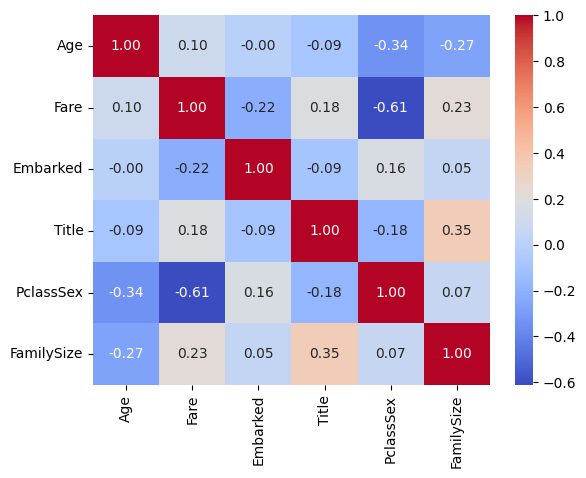

In [24]:
df_4.info()
corr_train = df_4.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [25]:
df_teste_new = pd.concat([df_test_2, df_gender['Survived']], axis=1)
df_teste_new.head()

,Age,Fare,Embarked,Title,PclassSex,FamilySize,Survived
0,34.5,7.8292,1,1.0,30,1,0
1,47.0,7.0000,2,3.0,31,2,1
2,62.0,9.6875,1,1.0,20,1,0
3,27.0,8.6625,2,1.0,30,1,0
4,22.0,12.2875,2,3.0,31,3,1


In [26]:
total_valores_faltantes = df_teste_new.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
Age           1
Fare          1
Embarked      0
Title         1
PclassSex     0
FamilySize    0
Survived      0
dtype: int64


In [27]:
linhas_com_nulos = df_teste_new[df_teste_new.isnull().any(axis=1)]
print("Linhas com valores nulos:")
print(linhas_com_nulos)

Linhas com valores nulos:
      Age    Fare  Embarked  Title  PclassSex  FamilySize  Survived
88    NaN    7.75         1    5.0         31           1         1
152  60.5     NaN         2    1.0         30           1         0
414  39.0  108.90         0    NaN         11           1         1


In [28]:
df_teste_new = df_teste_new.dropna()
df_teste_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         415 non-null    float64
 1   Fare        415 non-null    float64
 2   Embarked    415 non-null    int64  
 3   Title       415 non-null    float64
 4   PclassSex   415 non-null    int64  
 5   FamilySize  415 non-null    int64  
 6   Survived    415 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 25.9 KB


#Divisão dos dados

In [891]:
from sklearn.model_selection import train_test_split

SEED = 42

Y = df_balanced["Survived"]  # Variável alvo (0 ou 1), que indica se o passageiro sobreviveu

X = df_4  # Subconjunto dos dados

sensivel = X['Age']

# Divisão dos dados
# X_train, X_val, y_train, y_val = train_test_split(
#     X, Y, test_size=0.2, random_state=SEED, stratify=Y)

X_train, X_val, y_train, y_val, A_train, A_test = train_test_split(
    X, Y, sensivel, test_size=0.3, random_state=SEED, stratify=Y)

In [892]:
X_teste = df_teste_new.drop(['Survived'], axis=1)
Y_teste = df_teste_new['Survived']

#Normalização de Dados



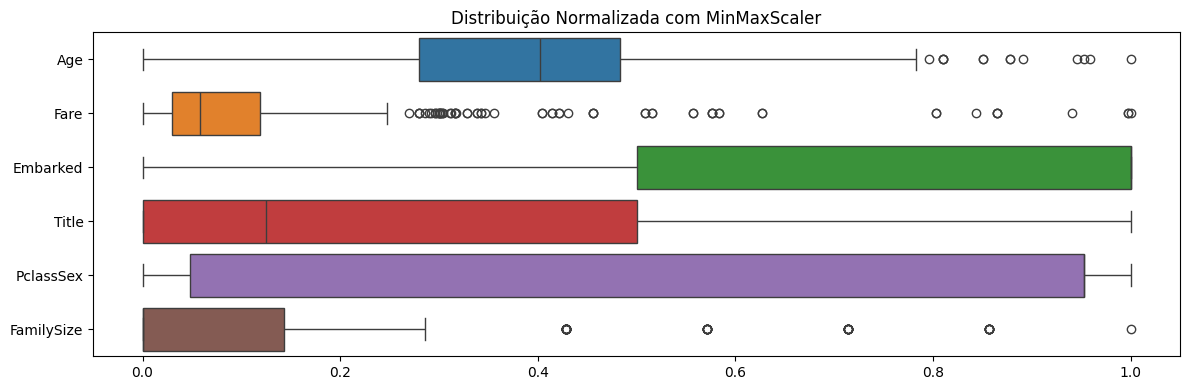

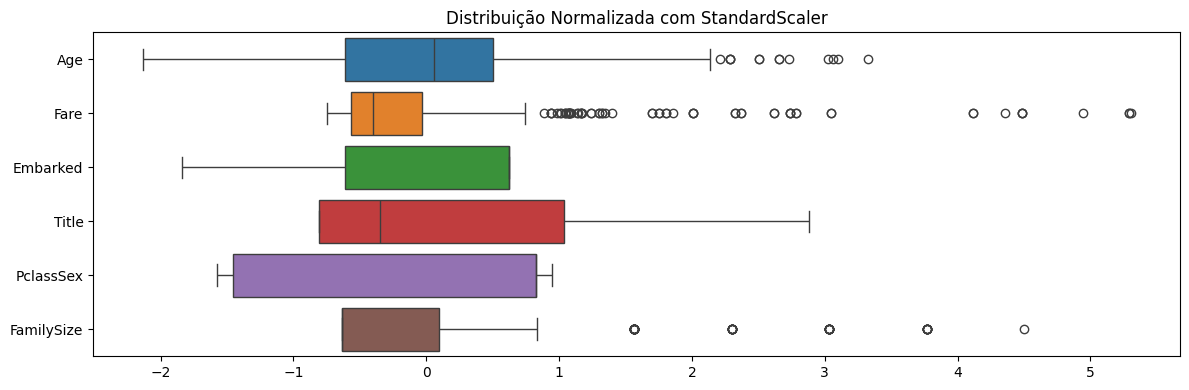

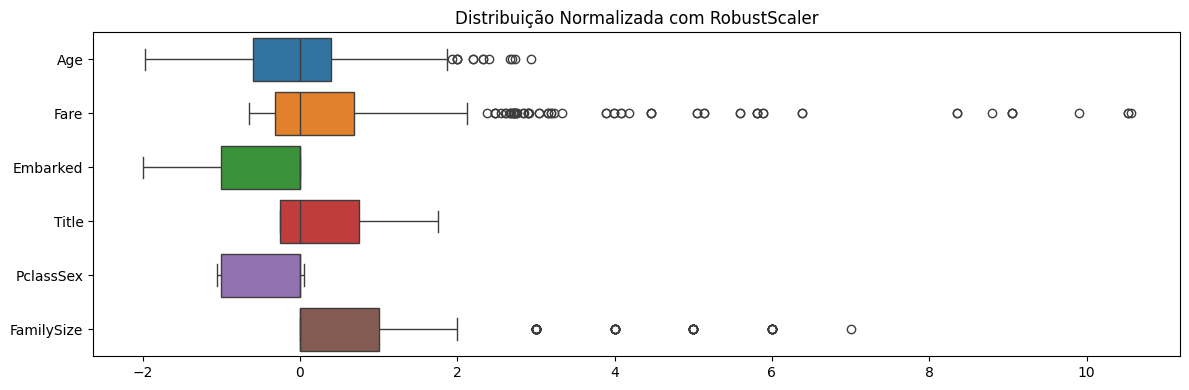

In [893]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Instancia um objeto MinMaxScaler, que será usado para a normalização Min-Max
scaler_minmax = MinMaxScaler()

# Instancia um objeto StandardScaler, que será usado para a padronização Z-score
scaler_zscore = StandardScaler()

# Instancia um objeto RobustScaler, que será usado para a normalização robusta a outliers
scaler_robust = RobustScaler()


# === Primeira Aplicação e Visualização dos Scalers (em df_3) ===

# Aplica o MinMaxScaler ao DataFrame df_3 (calcula min/max e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas com as colunas originais
X_train_m = pd.DataFrame(scaler_minmax.fit_transform(X_train), columns=X_train.columns)

# Aplica o StandardScaler ao DataFrame df_4 (calcula média/desvio padrão e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
X_train_z = pd.DataFrame(scaler_zscore.fit_transform(X_train), columns=X_train.columns)

# Aplica o RobustScaler ao DataFrame df_4 (calcula mediana/IQR e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
X_train_r = pd.DataFrame(scaler_robust.fit_transform(X_train), columns=X_train.columns)

# Configura o tamanho da figura para o primeiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com MinMaxScaler
sns.boxplot(data=X_train_m, orient='h')
plt.title("Distribuição Normalizada com MinMaxScaler")
# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Configura o tamanho da figura para o segundo boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com StandardScaler
sns.boxplot(data=X_train_z, orient='h')
plt.title("Distribuição Normalizada com StandardScaler")
# Ajusta o layout
plt.tight_layout()

# Configura o tamanho da figura para o terceiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com RobustScaler
sns.boxplot(data=X_train_r, orient='h')
plt.title("Distribuição Normalizada com RobustScaler")
# Ajusta o layout
plt.tight_layout()
# Exibe todos os gráficos criados
plt.show()

In [894]:
X_test_r = scaler_robust.transform(X_val) # Dados de validação normalizados com RobustScaler

X_test_z = scaler_zscore.transform(X_val) # Dados de validação normalizados com StandardScaler

X_test_m = scaler_minmax.transform(X_val) # Dados de validação normalizados com MinMaxScaler

In [896]:
x_robust_teste = scaler_robust.transform(X_teste) # Dados de teste normalizados com RobustScaler

X_standard_teste = scaler_zscore.transform(X_teste) # Dados de teste normalizados com StandardScaler

X_minmax_teste = scaler_minmax.transform(X_teste) # Dados de teste normalizados com MinMaxScaler

#Redes Neurais


In [752]:
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras import layers, callbacks, initializers
import random
import numpy as np

In [753]:
tf.random.set_seed(SEED)
# Defini a arquitetura da MLP
model = Sequential([
    Dense(32, input_shape=(X_train_r.shape[1],),
          activation='relu',
          kernel_initializer=initializers.HeNormal(seed=SEED),
          kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu',
          kernel_initializer=initializers.HeNormal(seed=SEED),
          kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))
])


# model.save_weights('model_weights.weights.h5')
# model.load_weights('model_weights.weights.h5')

# Verificar pesos
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"Layer {i} ({layer.name}):")
    if weights:
        print(f"  Weights shape: {weights[0].shape}")
        print(f"  Bias shape:    {weights[1].shape}")
        # Mostrar apenas alguns valores para não poluir a saída
        print(f"  First weight: {weights[0][0][0]:.5f}")
        print(f"  First bias:    {weights[1][0]:.5f}")
    else:
        print("  No weights")

Layer 0 (dense_135):
  Weights shape: (6, 32)
  Bias shape:    (32,)
  First weight: 0.01038
  First bias:    0.00000
Layer 1 (dense_136):
  Weights shape: (32, 64)
  Bias shape:    (64,)
  First weight: 0.00450
  First bias:    0.00000
Layer 2 (dense_137):
  Weights shape: (64, 1)
  Bias shape:    (1,)
  First weight: 0.00079
  First bias:    0.00000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [323]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

###Treinamento do Modelo com Robust

In [599]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_r, y_train,
    validation_data=(X_test_r, y_val),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
30/30 - 2s - 57ms/step - acc: 0.6492 - loss: 2.4176 - val_acc: 0.6780 - val_loss: 2.2745
Epoch 2/60
30/30 - 0s - 5ms/step - acc: 0.7521 - loss: 2.1470 - val_acc: 0.7463 - val_loss: 2.0299
Epoch 3/60
30/30 - 0s - 10ms/step - acc: 0.7689 - loss: 1.9237 - val_acc: 0.7756 - val_loss: 1.8260
Epoch 4/60
30/30 - 0s - 6ms/step - acc: 0.7479 - loss: 1.7364 - val_acc: 0.7366 - val_loss: 1.6547
Epoch 5/60
30/30 - 0s - 6ms/step - acc: 0.7500 - loss: 1.5779 - val_acc: 0.7463 - val_loss: 1.5094
Epoch 6/60
30/30 - 0s - 10ms/step - acc: 0.7542 - loss: 1.4432 - val_acc: 0.7366 - val_loss: 1.3865
Epoch 7/60
30/30 - 0s - 6ms/step - acc: 0.7500 - loss: 1.3293 - val_acc: 0.7659 - val_loss: 1.2827
Epoch 8/60
30/30 - 0s - 6ms/step - acc: 0.7584 - loss: 1.2325 - val_acc: 0.7707 - val_loss: 1.1944
Epoch 9/60
30/30 - 0s - 6ms/step - acc: 0.7689 - loss: 1.1492 - val_acc: 0.7805 - val_loss: 1.1184
Epoch 10/60
30/30 - 0s - 10ms/step - acc: 0.7710 - loss: 1.0780 - val_acc: 0.7854 - val_loss: 1.0530
Epoch

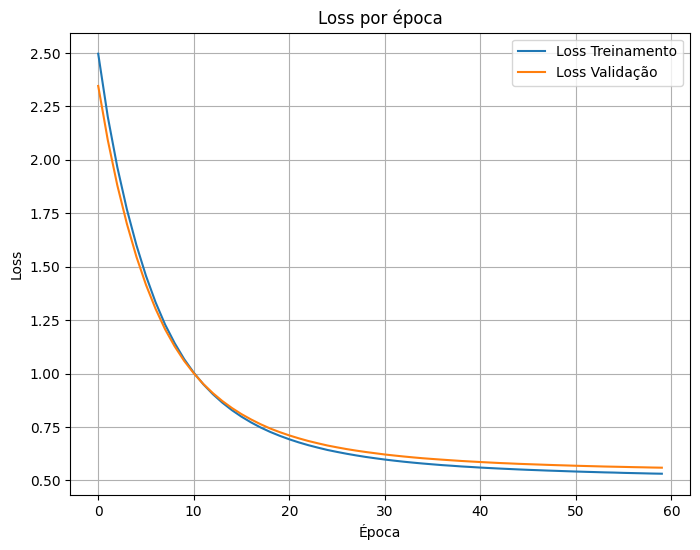

In [509]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [600]:
model.save_weights('robust_corr_weights.weights.h5')

In [38]:
model.load_weights('robust_corr_weights.weights.h5')

In [601]:
from sklearn import metrics
import numpy as np
Y_pred_rand_train_r = (model.predict(X_train_r) > 0.5).astype(int)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [602]:
Y_pred_rand_val_r = (model.predict(X_test_r) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [603]:
Y_pred_rand_test_r = (model.predict(x_train_robust_teste) > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


###Treinamento do Modelo com Z-score

In [605]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_z, y_train,
    validation_data=(X_test_z, y_val),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
30/30 - 2s - 72ms/step - acc: 0.6954 - loss: 2.3971 - val_acc: 0.7024 - val_loss: 2.2527
Epoch 2/60
30/30 - 0s - 9ms/step - acc: 0.7332 - loss: 2.1297 - val_acc: 0.7122 - val_loss: 2.0172
Epoch 3/60
30/30 - 0s - 12ms/step - acc: 0.7332 - loss: 1.9149 - val_acc: 0.7220 - val_loss: 1.8219
Epoch 4/60
30/30 - 1s - 19ms/step - acc: 0.7521 - loss: 1.7348 - val_acc: 0.7610 - val_loss: 1.6562
Epoch 5/60
30/30 - 0s - 12ms/step - acc: 0.7689 - loss: 1.5813 - val_acc: 0.7707 - val_loss: 1.5148
Epoch 6/60
30/30 - 0s - 16ms/step - acc: 0.7647 - loss: 1.4497 - val_acc: 0.7805 - val_loss: 1.3933
Epoch 7/60
30/30 - 0s - 9ms/step - acc: 0.7647 - loss: 1.3369 - val_acc: 0.7854 - val_loss: 1.2890
Epoch 8/60
30/30 - 0s - 10ms/step - acc: 0.7752 - loss: 1.2397 - val_acc: 0.7805 - val_loss: 1.1993
Epoch 9/60
30/30 - 0s - 11ms/step - acc: 0.7815 - loss: 1.1558 - val_acc: 0.7854 - val_loss: 1.1217
Epoch 10/60
30/30 - 0s - 9ms/step - acc: 0.7815 - loss: 1.0832 - val_acc: 0.7902 - val_loss: 1.0543
Ep

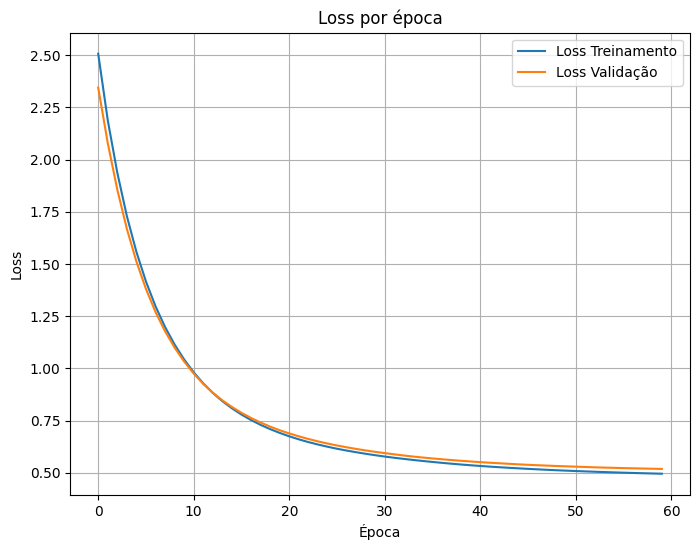

In [519]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [606]:
model.save_weights('standard_corr_weights.weights.h5')

In [108]:
model.load_weights('standard_corr_weights.weights.h5')

In [607]:
Y_pred_rand_train_z = (model.predict(X_train_z) > 0.5).astype(int)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [608]:
Y_pred_rand_val_z = (model.predict(X_test_z) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [609]:
Y_pred_rand_test_z = (model.predict(X_train_standard_teste) > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


###Treinamento do Modelo com Min-Max

In [611]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_m, y_train,
    validation_data=(X_test_m, y_val),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
30/30 - 28s - 917ms/step - acc: 0.6366 - loss: 2.4296 - val_acc: 0.6634 - val_loss: 2.2837
Epoch 2/60
30/30 - 0s - 7ms/step - acc: 0.6744 - loss: 2.1612 - val_acc: 0.6976 - val_loss: 2.0384
Epoch 3/60
30/30 - 0s - 10ms/step - acc: 0.7101 - loss: 1.9340 - val_acc: 0.7122 - val_loss: 1.8308
Epoch 4/60
30/30 - 0s - 10ms/step - acc: 0.7269 - loss: 1.7414 - val_acc: 0.7415 - val_loss: 1.6544
Epoch 5/60
30/30 - 0s - 7ms/step - acc: 0.7332 - loss: 1.5776 - val_acc: 0.7512 - val_loss: 1.5028
Epoch 6/60
30/30 - 1s - 19ms/step - acc: 0.7290 - loss: 1.4379 - val_acc: 0.7561 - val_loss: 1.3743
Epoch 7/60
30/30 - 0s - 12ms/step - acc: 0.7353 - loss: 1.3207 - val_acc: 0.7659 - val_loss: 1.2658
Epoch 8/60
30/30 - 0s - 7ms/step - acc: 0.7374 - loss: 1.2222 - val_acc: 0.7659 - val_loss: 1.1742
Epoch 9/60
30/30 - 0s - 8ms/step - acc: 0.7395 - loss: 1.1391 - val_acc: 0.7707 - val_loss: 1.0969
Epoch 10/60
30/30 - 0s - 9ms/step - acc: 0.7479 - loss: 1.0688 - val_acc: 0.7659 - val_loss: 1.0313
Ep

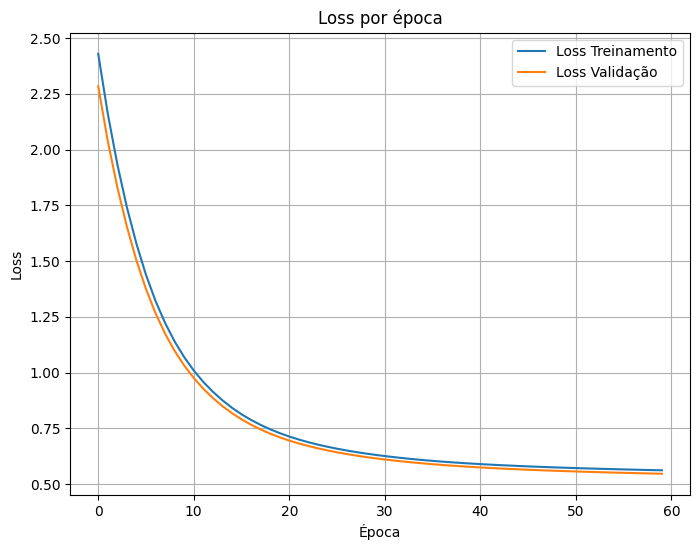

In [612]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [613]:
model.save_weights('minmax_corr_weights.weights.h5')

In [46]:
model.load_weights('minmax_corr_weights.weights.h5')

In [614]:
Y_pred_rand_train_m = (model.predict(X_train_m) > 0.5).astype(int)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [615]:
Y_pred_rand_val_m = (model.predict(X_test_m) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [616]:
Y_pred_rand_test_m = (model.predict(X_train_minmax_teste) > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [618]:
from tabulate import tabulate

metrics_data = {
    'Conjunto': ['robust', 'min-max', 'z-score'],
    'Precision': [
        round(metrics.precision_score(y_val, Y_pred_rand_val_r)*100, 2),
        round(metrics.precision_score(y_val, Y_pred_rand_val_m)*100, 2),
        round(metrics.precision_score(y_val, Y_pred_rand_val_z)*100, 2)
    ],
    'Accuracy': [
        round(metrics.accuracy_score(y_val, Y_pred_rand_val_r)*100, 2),
        round(metrics.accuracy_score(y_val, Y_pred_rand_val_m)*100, 2),
        round(metrics.accuracy_score(y_val, Y_pred_rand_val_z)*100, 2)
    ],
    'Recall': [
        round(metrics.recall_score(y_val, Y_pred_rand_val_r)*100, 2),
        round(metrics.recall_score(y_val, Y_pred_rand_val_m)*100, 2),
        round(metrics.recall_score(y_val, Y_pred_rand_val_z)*100, 2)
    ],
    'F1 Score': [
        round(metrics.f1_score(y_val, Y_pred_rand_val_r)*100, 2),
        round(metrics.f1_score(y_val, Y_pred_rand_val_m)*100, 2),
        round(metrics.f1_score(y_val, Y_pred_rand_val_z)*100, 2)
    ]
}

# Criar DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Exibir tabela formatada
print(tabulate(df_metrics, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤═════════════╤════════════╤══════════╤════════════╕
│ Conjunto   │   Precision │   Accuracy │   Recall │   F1 Score │
╞════════════╪═════════════╪════════════╪══════════╪════════════╡
│ robust     │       78.1  │      79.02 │    80.39 │      79.23 │
├────────────┼─────────────┼────────────┼──────────┼────────────┤
│ min-max    │       78.3  │      79.51 │    81.37 │      79.81 │
├────────────┼─────────────┼────────────┼──────────┼────────────┤
│ z-score    │       82.61 │      79.51 │    74.51 │      78.35 │
╘════════════╧═════════════╧════════════╧══════════╧════════════╛


In [619]:
metrics_data_teste = {
    'Conjunto': ['robust', 'min-max', 'z-score'],
    'Precision': [
        round(metrics.precision_score(Y_teste, Y_pred_rand_test_r)*100, 2),
        round(metrics.precision_score(Y_teste, Y_pred_rand_test_m)*100, 2),
        round(metrics.precision_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ],
    'Accuracy': [
        round(metrics.accuracy_score(Y_teste, Y_pred_rand_test_r)*100, 2),
        round(metrics.accuracy_score(Y_teste, Y_pred_rand_test_m)*100, 2),
        round(metrics.accuracy_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ],
    'Recall': [
        round(metrics.recall_score(Y_teste, Y_pred_rand_test_r)*100, 2),
        round(metrics.recall_score(Y_teste, Y_pred_rand_test_m)*100, 2),
        round(metrics.recall_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ],
    'F1 Score': [
        round(metrics.f1_score(Y_teste, Y_pred_rand_test_r)*100, 2),
        round(metrics.f1_score(Y_teste, Y_pred_rand_test_m)*100, 2),
        round(metrics.f1_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ]
}

# Cabeçalho
df_metrics_teste = pd.DataFrame(metrics_data_teste)

# Exibir tabela formatada
print(tabulate(df_metrics_teste, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤═════════════╤════════════╤══════════╤════════════╕
│ Conjunto   │   Precision │   Accuracy │   Recall │   F1 Score │
╞════════════╪═════════════╪════════════╪══════════╪════════════╡
│ robust     │       72.79 │      78.8  │    66    │      69.23 │
├────────────┼─────────────┼────────────┼──────────┼────────────┤
│ min-max    │       69.65 │      82.89 │    93.33 │      79.77 │
├────────────┼─────────────┼────────────┼──────────┼────────────┤
│ z-score    │       75.54 │      86.51 │    92.67 │      83.23 │
╘════════════╧═════════════╧════════════╧══════════╧════════════╛


#Mitigar injustiças com FAIRLEARN

In [ ]:
!pip install fairlearn

##Análise de Justiça

In [897]:
A_train["AgeGroup"] = pd.cut(
    A_train,
    bins=[0, 15, 100],  # <=15: Criança | >15: Adulto
    labels=[0, 1]
)

In [898]:
A_test["AgeGroup"] = pd.cut(
    A_test,
    bins=[0, 15, 100],
    labels=[0, 1]
)

In [ ]:
A_teste = X_teste['Age']
A_teste["AgeGroup"] = pd.cut(
    A_teste,
    bins=[0, 15, 100],
    labels=[0, 1]
)

     accuracy  false_positive_rate  false_negative_rate
Age                                                    
0    0.890909             0.266667             0.050000
1    0.814727             0.147321             0.228426


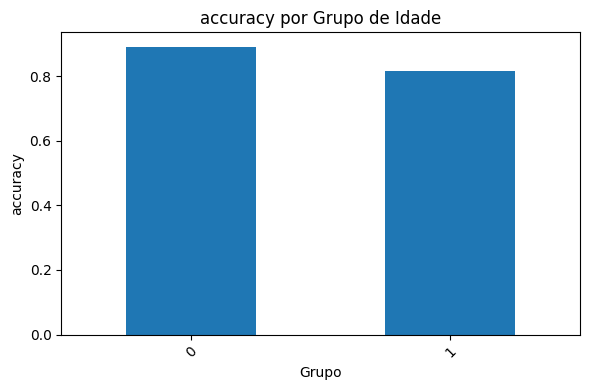

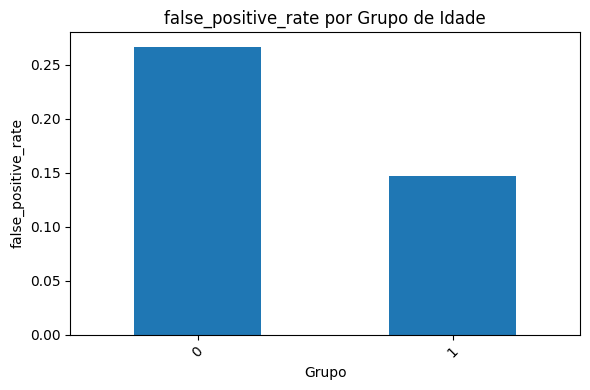

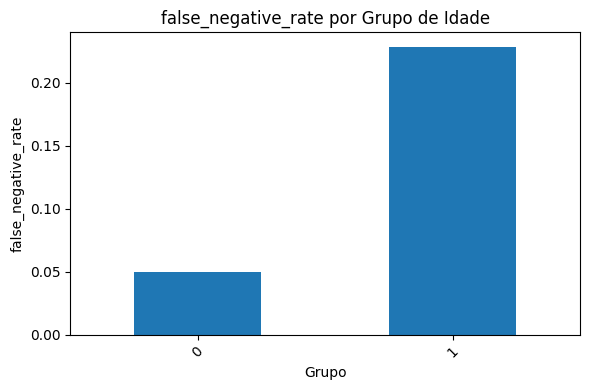

In [907]:
from fairlearn.metrics import MetricFrame,false_positive_rate, false_negative_rate
from sklearn.metrics import accuracy_score

# Supondo que 'y_true' são os rótulos verdadeiros, 'y_pred' são as previsões do modelo,
# e 'sensitive_features' é a série do pandas com os atributos sensíveis.

metrics = {
    'accuracy': accuracy_score,
    'false_positive_rate': false_positive_rate,
    'false_negative_rate': false_negative_rate
}


grouped_on_race = MetricFrame(metrics=metrics,
                               y_true=y_train,
                               y_pred=Y_pred_rand_train_z,
                               sensitive_features=A_train["AgeGroup"])

print(grouped_on_race.by_group)

metrics_by_group = grouped_on_race.by_group

# Plotar cada métrica
for metric in metrics_by_group.columns:
    metrics_by_group[metric].plot(
        kind="bar",
        title=f"{metric} por Grupo de Idade",
        xlabel="Grupo",
        ylabel=metric,
        figsize=(6, 4)
    )
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ajusta automaticamente o espaçamento
    plt.show()

##Ajuste de Threshold para Equalized Odds

In [901]:
model.load_weights('standard_corr_weights.weights.h5')

In [ ]:
import numpy as np
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.base import BaseEstimator, ClassifierMixin

# 1. Criar um wrapper scikit-learn para seu modelo Keras
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # Seu modelo já está treinado, não precisamos refazer o fit
        return self

    def predict(self, X):
        return (self.keras_model.predict(X).flatten() > 0.5).astype(int)

    def predict_proba(self, X):
        proba = self.keras_model.predict(X).flatten()
        return np.vstack([1-proba, proba]).T  # Formato scikit-learn (n_samples, 2)

# 2. Envolver seu modelo Keras
wrapped_model = KerasWrapper(model)

# 3. Criar o ThresholdOptimizer
threshold_opt = ThresholdOptimizer(
    estimator=wrapped_model,  # Nosso wrapper
    constraints="equalized_odds",  # Ou "equalized_odds"
    prefit=True  # Já está treinado
)

# 4. Ajustar os thresholds
threshold_opt.fit(
    X=X_train_z,  # Dados originais
    y=y_train,
    sensitive_features=A_train["AgeGroup"],

)


##Métricas para o dataset de teste

In [903]:
# 5. Fazer previsões justas

y_test_fair_teste = threshold_opt.predict(
    X_standard_teste,
    sensitive_features=A_teste["AgeGroup"]
)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.11/dist-packages/fairlearn/postprocessing/_interpolated_thresholder.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00483596 0.95338954 0.00483596 0.95338954 0.95338954 0.95338954
 0.95338954 0.95338954 0.00483596 0.00483596 0.95338954 0.95338954
 0.19928945 0.95338954 0.95338954 0.95338954 0.95338954 0.00483596
 0.19928945 0.95338954 0.19928945 0.95338954 0.95338954 0.95338954
 0.95338954 0.95338954 0.95338954 0.95338954 0.19928945 0.19928945
 0.00483596 0.00483596 0.00483596 0.19928945 0.19928945 0.95338954]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  positive_probs[sensitive_feature_vector == a] = interpolated_predictions[


In [906]:
from sklearn import metrics
import numpy as np

metrics_data_teste = {
    'Conjunto': ['fairlearn', 'original'],
    'Accuracy': [
      round(accuracy_score(Y_teste, y_test_fair_teste)*100, 2),
      round(metrics.accuracy_score(Y_teste, Y_pred_rand_test_z)*100, 2),
    ],
    'Precision': [
        round(precision_score(Y_teste, y_test_fair_teste)*100, 2),
        round(precision_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ],
    'Recall': [
        round(recall_score(Y_teste, y_test_fair_teste)*100, 2),
        round(recall_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ],
    'F1 Score': [
        round(f1_score(Y_teste, y_test_fair_teste)*100, 2),
        round(f1_score(Y_teste, Y_pred_rand_test_z)*100, 2)
    ]
}

# Cabeçalho
df_metrics_teste = pd.DataFrame(metrics_data_teste)

# Exibir tabela formatada
print(tabulate(df_metrics_teste, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Conjunto   │   Accuracy │   Precision │   Recall │   F1 Score │
╞════════════╪════════════╪═════════════╪══════════╪════════════╡
│ fairlearn  │      88.67 │       82.8  │    86.67 │      84.69 │
├────────────┼────────────┼─────────────┼──────────┼────────────┤
│ original   │      86.51 │       75.54 │    92.67 │      83.23 │
╘════════════╧════════════╧═════════════╧══════════╧════════════╛
